# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [70]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd
import re


# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [71]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [72]:
# Your code here:
fifa.head()


Name  Age Nationality  Overall  Potential  \
0           L. Messi   31   Argentina       94         94   
1  Cristiano Ronaldo   33    Portugal       94         94   
2          Neymar Jr   26      Brazil       92         93   
3             De Gea   27       Spain       91         93   
4       K. De Bruyne   27     Belgium       91         92   

                  Club    Value Preferred Foot Position  Weak Foot  \
0         FC Barcelona  €110.5M           Left       RF        4.0   
1             Juventus     €77M          Right       ST        4.0   
2  Paris Saint-Germain  €118.5M          Right       LW        5.0   
3    Manchester United     €72M          Right       GK        3.0   
4      Manchester City    €102M          Right      RCM        5.0   

   Acceleration  SprintSpeed  Stamina  Strength  LongShots  Aggression  \
0          91.0         86.0     72.0      59.0       94.0        48.0   
1          89.0         91.0     88.0      79.0       93.0        63.0   
2          94.0         90.0     81.0      49.0       82.0        56.0   
3          57.0         58.0     43.0      64.0       12.0        38.0   
4          78.0         76.0     90.0      75.0       91.0        76.0   

   Interceptions  Positioning  Vision  Penalties  
0           22.0         94.0    94.0       75.0  
1           29.0         95.0    82.0       85.0  
2           36.0         89.0    87.0       81.0  
3           30.0         12.0    68.0       40.0  
4           61.0         87.0    94.0       79.0

Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [73]:
# Your code here:
def toNumeric(x):
    if "K" in x:
        res = (float(re.findall(r'[0-9.]*',x)[1])/1000)
    else:
        res = float(re.findall(r'[0-9.]*',x)[1])  
    return res

fifa['ValueNumeric'] = fifa['Value'].apply(toNumeric)
fifa

Name  Age Nationality  Overall  Potential  \
0                L. Messi   31   Argentina       94         94   
1       Cristiano Ronaldo   33    Portugal       94         94   
2               Neymar Jr   26      Brazil       92         93   
3                  De Gea   27       Spain       91         93   
4            K. De Bruyne   27     Belgium       91         92   
...                   ...  ...         ...      ...        ...   
18202        J. Lundstram   19     England       47         65   
18203  N. Christoffersson   19      Sweden       47         63   
18204           B. Worman   16     England       47         67   
18205      D. Walker-Rice   17     England       47         66   
18206           G. Nugent   16     England       46         66   

                      Club    Value Preferred Foot Position  Weak Foot  ...  \
0             FC Barcelona  €110.5M           Left       RF        4.0  ...   
1                 Juventus     €77M          Right       ST        4.0  ...   
2      Paris Saint-Germain  €118.5M          Right       LW        5.0  ...   
3        Manchester United     €72M          Right       GK        3.0  ...   
4          Manchester City    €102M          Right      RCM        5.0  ...   
...                    ...      ...            ...      ...        ...  ...   
18202      Crewe Alexandra     €60K          Right       CM        2.0  ...   
18203       Trelleborgs FF     €60K          Right       ST        2.0  ...   
18204     Cambridge United     €60K          Right       ST        3.0  ...   
18205      Tranmere Rovers     €60K          Right       RW        3.0  ...   
18206      Tranmere Rovers     €60K          Right       CM        3.0  ...   

       SprintSpeed  Stamina  Strength  LongShots  Aggression  Interceptions  \
0             86.0     72.0      59.0       94.0        48.0           22.0   
1             91.0     88.0      79.0       93.0        63.0           29.0   
2             90.0     81.0      49.0       82.0        56.0           36.0   
3             58.0     43.0      64.0       12.0        38.0           30.0   
4             76.0     90.0      75.0       91.0        76.0           61.0   
...            ...      ...       ...        ...         ...            ...   
18202         57.0     40.0      47.0       38.0        46.0           46.0   
18203         39.0     43.0      67.0       42.0        47.0           16.0   
18204         69.0     55.0      32.0       45.0        32.0           15.0   
18205         60.0     40.0      48.0       34.0        33.0           22.0   
18206         55.0     47.0      60.0       32.0        56.0           42.0   

       Positioning  Vision  Penalties  ValueNumeric  
0             94.0    94.0       75.0        110.50  
1             95.0    82.0       85.0         77.00  
2             89.0    87.0       81.0        118.50  
3             12.0    68.0       40.0         72.00  
4             87.0    94.0       79.0        102.00  
...            ...     ...        ...           ...  
18202         39.0    52.0       43.0          0.06  
18203         46.0    33.0       43.0          0.06  
18204         48.0    43.0       55.0          0.06  
18205         44.0    47.0       50.0          0.06  
18206         34.0    49.0       33.0          0.06  

[18207 rows x 21 columns]

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [74]:
# Your code here:
import statsmodels.formula.api as smf
import statsmodels.api as sm

model = smf.ols("ValueNumeric ~ C(Position)", data=fifa).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq       df          F        PR(>F)
C(Position)   16496.092002     26.0  20.784194  5.517758e-96
Residual     553137.022264  18120.0        NaN           NaN

In [75]:
model = smf.ols("ValueNumeric ~ C(fifa['Preferred Foot'])", data=fifa).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq       df         F    PR(>F)
C(fifa['Preferred Foot'])     160.997350      1.0  5.132594  0.023492
Residual                   569542.215531  18157.0       NaN       NaN

In [97]:
model = smf.ols("ValueNumeric ~ C(fifa['Preferred Foot'])* C(Position)", data=fifa).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq       df          F  \
C(fifa['Preferred Foot'])                 231.040261      1.0   7.554510   
C(Position)                             16605.324356     26.0  20.882988   
C(fifa['Preferred Foot']):C(Position)    5180.302756     26.0   6.514790   
Residual                               546336.333139  17864.0        NaN   

                                             PR(>F)  
C(fifa['Preferred Foot'])              5.992017e-03  
C(Position)                            1.763151e-96  
C(fifa['Preferred Foot']):C(Position)  7.339843e-23  
Residual                                        NaN

What is your conclusion from this ANOVA?

In [79]:
# Your conclusions here:
# The player's value is influenced by Position and by Preferred Foot because p-value for preferred foot and
# position are smaller than 0.05
 


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [80]:
# Your code here:
model = smf.ols("ValueNumeric ~ C(Nationality)", data=fifa).fit()
sm.stats.anova_lm(model, typ=2)


sum_sq       df         F         PR(>F)
C(Nationality)   32812.244217    163.0  6.762478  4.840477e-134
Residual        537095.118316  18043.0       NaN            NaN

What is your conclusion from this ANOVA?

In [81]:
# P-value is < 0.05, so we can reject the null hypothesis and say that the Numeric Value is influenced 
# by the nationality

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [88]:
# Your code here:
fifa.isnull().sum()
fifa = fifa.dropna()



Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [89]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Preferred Foot', 'Position', 'Weak Foot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'ValueNumeric'],
      dtype='object')

In [90]:
# Your code here:
X = sm.add_constant(fifa[['Stamina', 'SprintSpeed']])
Y = fifa.ValueNumeric

In [91]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

In [92]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Wed, 08 Jul 2020   Prob (F-statistic):          8.04e-193
Time:                        17:01:36   Log-Likelihood:                -55952.
No. Observations:               17918   AIC:                         1.119e+05
Df Residuals:                   17915   BIC:                         1.119e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.0700      0.197    -15.600      0.000      -3.456      -2.684
Stamina         0.0604      0.003     18.349      0.000       0.054       0.067
SprintSpeed     0.0263      0.004      7.380      0.000       0.019       0.033
==============================================================================
Omnibus:                    22840.822   Durbin-Watson:                   0.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4648189.356
Skew:                           7.042   Prob(JB):                         0.00
Kurtosis:                      80.638   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [11]:
# Your conclusions here:
# R-squared is very small so we can say that the model doesn't fit the data very well, in fact it does a poor job.


Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [93]:
# Your code here:
X = sm.add_constant(fifa[['Potential']])
Y = fifa.ValueNumeric

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:10:10   Log-Likelihood:                -52728.
No. Observations:               17918   AIC:                         1.055e+05
Df Residuals:                   17916   BIC:                         1.055e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.4390      0.400    -88.693      0.000     -36.222     -34.656
Potential      0.5312      0.006     95.172      0.000       0.520       0.542
==============================================================================
Omnibus:                    23030.426   Durbin-Watson:                   0.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6340772.995
Skew:                           7.013   Prob(JB):                         0.00
Kurtosis:                      94.084   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [95]:
# Your conclusions here:
# The R squared is 0.336 so the linear model doesn't fit the data that well, probably because there is an exponential
# relationship.
# The prob of the F-statistic is 0, which is << 0.05 meaning that the null hypothesis can be rejected and that there 
# is a relationship between potential and value.


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

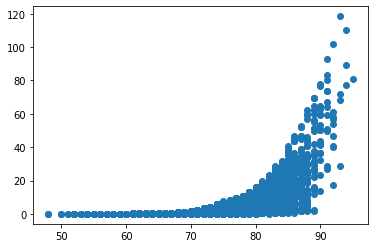

In [96]:
# Your code here:
%matplotlib inline
from matplotlib import pyplot as plt
plt.scatter(fifa['Potential'],fifa['ValueNumeric'])


In [ ]:
# The relationship is not linear but rather exponential